In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
from scipy.stats import ttest_ind

%matplotlib inline

## Successful Cases data preparation (df_completed)

In [18]:
# Dataset Successful cases:
df_completed = pd.read_csv('../data/clean/df_completed.csv', sep=',')

In [19]:
df_completed.shape

(196645, 15)

In [20]:
# Remove duplicate session entries, retaining onlu the latest entry for each session

# Sort by 'visit_id' and 'date_time' (as string) to ensure the latest record is at the end for each visit_id
df_completed = df_completed.sort_values(by=['visit_id', 'date_time'], ascending=[True, False])

# Drop duplicates, keeping the last entry for each 'visit_id'
df_completed = df_completed.drop_duplicates(subset='visit_id', keep='first')

df_completed.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,confirm_reached
10,7338123,612065484_94198474375,100019538_17884295066_43909,confirm,2017-04-09 16:24:58,Test,7,88,23.5,M,2,26436.73,6,9,1
15,2478628,754122351_18568832435,100022086_87870757897_149620,confirm,2017-05-23 20:47:01,Test,16,198,47.0,F,2,32456.28,2,5,1
21,3479519,194422203_56127484794,10006594_66157970412_679648,confirm,2017-04-13 11:56:12,Control,12,150,52.5,F,2,349316.66,2,5,1
27,5477656,164180384_39691984082,10007589_47780784567_391490,confirm,2017-05-18 08:03:33,Control,10,122,54.0,M,2,24706.77,1,4,1
32,8631696,429350107_31978453627,100173292_91322748906_143563,confirm,2017-04-25 10:30:30,Test,11,137,46.5,M,3,134716.64,3,6,1


In [21]:
df_completed.shape

(32547, 15)

## Falied Cases data preparation (df_incomplete)

In [23]:
# Dataset Failed Cases:
df_incomplete = pd.read_csv('../data/clean/df_incomplete.csv', sep=',')

In [24]:
df_incomplete.shape

(106703, 14)

In [25]:
# Remove duplicate session entries, retaining only the latest entry for each session

# Sort by 'visit_id' and 'date_time' (as string) to ensure the latest record is at the end for each visit_id
df_incomplete = df_incomplete.sort_values(by=['visit_id', 'date_time'], ascending=[True, False])

# Drop duplicates, keeping the last entry for each 'visit_id'
df_incomplete = df_incomplete.drop_duplicates(subset='visit_id', keep='first')

df_incomplete.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,Control,9,118,35.0,F,2,34897.47,3,6
4,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,Control,16,202,78.0,M,2,146827.14,5,8
11,4823947,611052344_43146965242,100057941_88477660212_944512,step_3,2017-04-09 11:34:24,Control,7,86,52.0,U,2,47340.11,5,8
12,3432704,118095622_91258648673,100071743_53464757454_616703,start,2017-04-07 10:50:20,Control,21,252,60.0,M,2,27970.87,1,4
14,8306812,987870350_90903222476,100096068_8301717872_987164,step_1,2017-05-22 18:15:14,Control,9,110,31.0,M,2,37853.69,3,6


In [26]:
df_incomplete.shape

(31235, 14)

 ## Exploratory Analysis
 ### Numerical variables

In [28]:
# Descriptive statistics for completed cases
display("Descriptive statistics for Completed cases:")
display(df_completed[['clnt_age', 'clnt_tenure_yr', 'bal', 'calls_6_mnth', 'logons_6_mnth']].describe())

'Descriptive statistics for Completed cases:'

,clnt_age,clnt_tenure_yr,bal,calls_6_mnth,logons_6_mnth
count,32536.000000,32547.000000,3.253700e+04,32547.000000,32547.000000
mean,46.558458,11.940578,1.513375e+05,3.149998,6.182260
std,15.211948,6.838210,3.063588e+05,2.181114,2.171875
min,17.000000,0.000000,2.378944e+04,0.000000,0.000000
25%,33.000000,6.000000,3.978838e+04,1.000000,4.000000
50%,47.000000,11.000000,6.566726e+04,3.000000,6.000000
75%,58.500000,15.000000,1.406765e+05,5.000000,9.000000
max,95.500000,55.000000,1.632004e+07,6.000000,9.000000


In [29]:
# Descriptive statistics for incomplete cases
display("Descriptive statistics for Incomplete cases:")
display(df_incomplete[['clnt_age', 'clnt_tenure_yr', 'bal', 'calls_6_mnth', 'logons_6_mnth']].describe())

'Descriptive statistics for Incomplete cases:'

,clnt_age,clnt_tenure_yr,bal,calls_6_mnth,logons_6_mnth
count,31226.000000,31235.000000,3.122700e+04,31235.000000,31235.000000
mean,50.253170,12.424684,1.675212e+05,3.380599,6.420874
std,16.004908,7.051952,3.458253e+05,2.210851,2.195853
min,17.000000,0.000000,2.378949e+04,0.000000,0.000000
25%,36.000000,6.000000,4.263968e+04,1.000000,4.000000
50%,52.000000,11.000000,7.258381e+04,3.000000,7.000000
75%,62.500000,16.000000,1.601630e+05,6.000000,9.000000
max,96.000000,55.000000,1.632004e+07,6.000000,9.000000


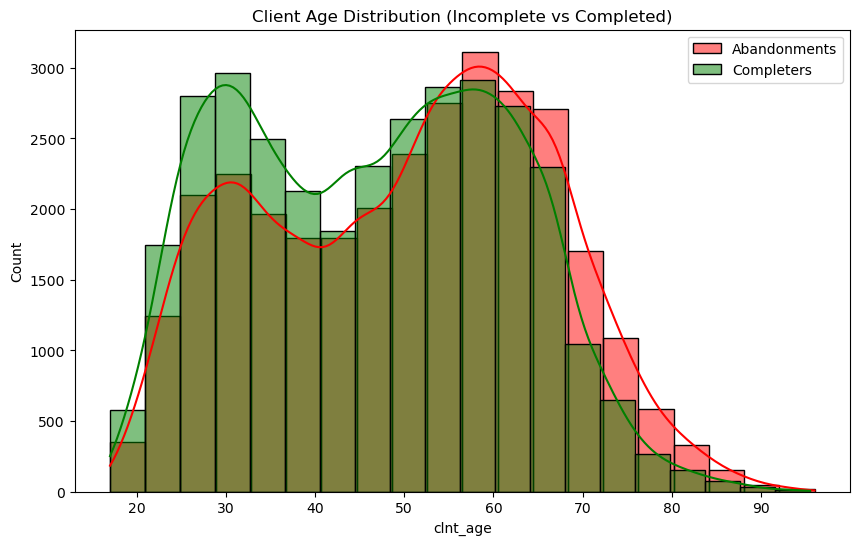

In [30]:
# Compare client age distribution
plt.figure(figsize=(10,6))
sns.histplot(df_incomplete['clnt_age'], color='red', label='Abandonments', kde=True, bins=20)
sns.histplot(df_completed['clnt_age'], color='green', label='Completers', kde=True, bins=20)
plt.title('Client Age Distribution (Incomplete vs Completed)')
plt.legend()
plt.show()

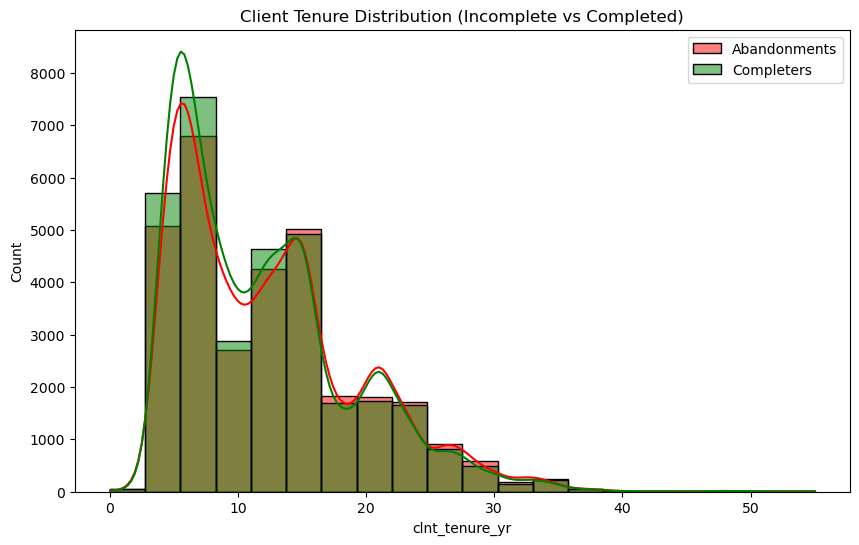

In [75]:
# Compare clnt_tenure_yr distribution
plt.figure(figsize=(10,6))
sns.histplot(df_incomplete['clnt_tenure_yr'], color='red', label='Abandonments', kde=True, bins=20)
sns.histplot(df_completed['clnt_tenure_yr'], color='green', label='Completers', kde=True, bins=20)
plt.title('Client Tenure Distribution (Incomplete vs Completed)')
plt.legend()
plt.show()

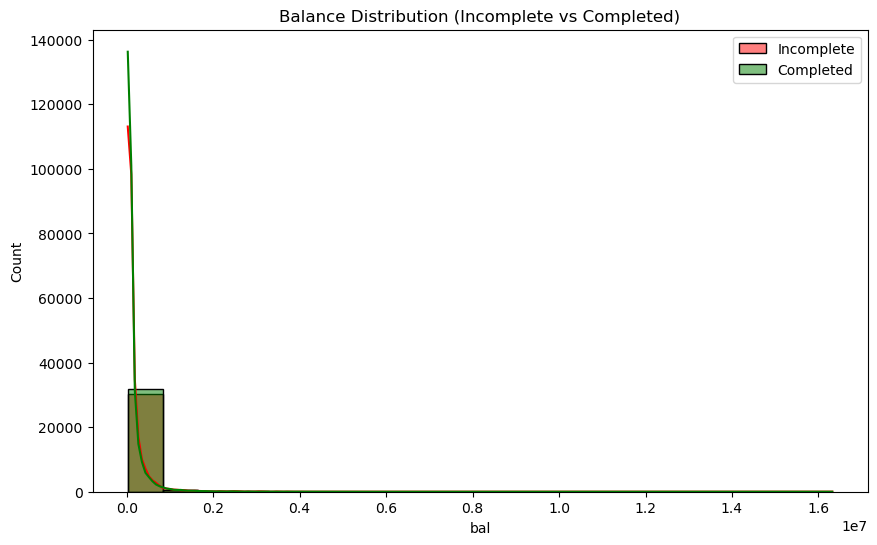

In [32]:
# Compare balance distribution
plt.figure(figsize=(10,6))
sns.histplot(df_incomplete['bal'], color='red', label='Incomplete', kde=True, bins=20)
sns.histplot(df_completed['bal'], color='green', label='Completed', kde=True, bins=20)
plt.title('Balance Distribution (Incomplete vs Completed)')
plt.legend()
plt.show()

 ## Exploratory Analysis
 ### Categorical variables
 #### Gender Distribution

In [34]:
# Gender distribution comparison
print("Gender Distribution in Incomplete Cases:")
print(df_incomplete['gendr'].value_counts())

print("\nGender Distribution in Completed Cases:")
print(df_completed['gendr'].value_counts())

Gender Distribution in Incomplete Cases:
gendr
F    10624
M    10517
U    10094
Name: count, dtype: int64

Gender Distribution in Completed Cases:
gendr
U    11361
M    11103
F    10083
Name: count, dtype: int64


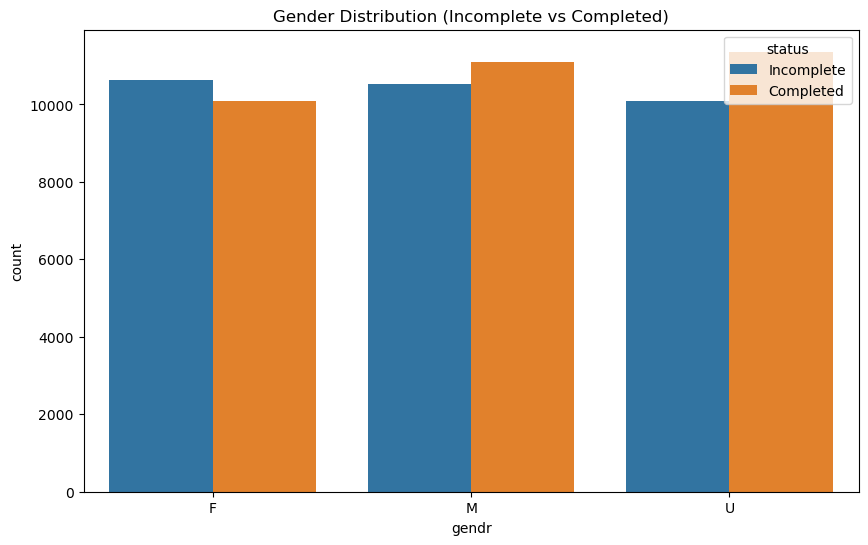

In [35]:
# Bar plot for gender distribution
plt.figure(figsize=(10,6))
sns.countplot(x='gendr', hue='status', data=pd.concat([df_incomplete.assign(status='Incomplete'), df_completed.assign(status='Completed')]))
plt.title('Gender Distribution (Incomplete vs Completed)')
plt.show()

#### Number of Accounts

Number of Accounts Distribution in Incomplete Cases:
num_accts
2    24678
3     5448
4      923
5      158
6       14
0        8
7        6
Name: count, dtype: int64

Number of Accounts Distribution in Completed Cases:
num_accts
2    25106
3     6134
4     1134
5      141
6       17
0       10
7        4
1        1
Name: count, dtype: int64


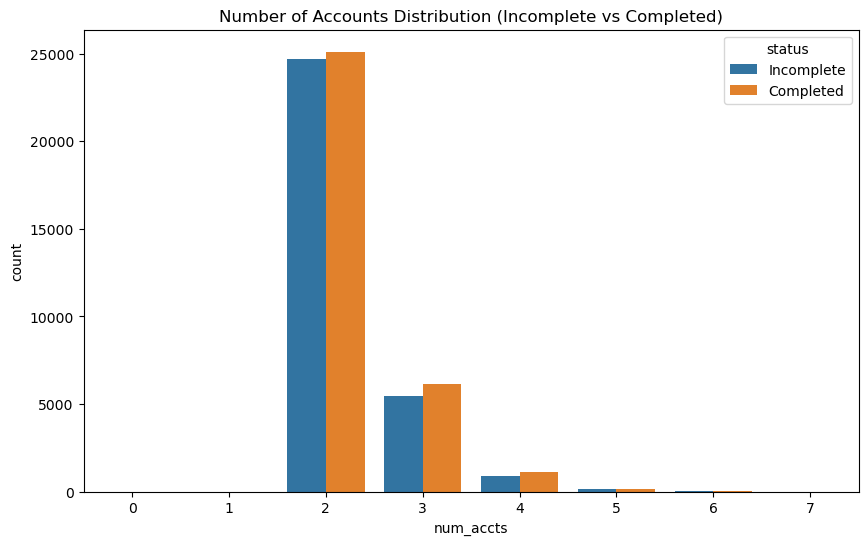

In [37]:
# Distribution of number of accounts
print("Number of Accounts Distribution in Incomplete Cases:")
print(df_incomplete['num_accts'].value_counts())

print("\nNumber of Accounts Distribution in Completed Cases:")
print(df_completed['num_accts'].value_counts())

# Bar plot for number of accounts
plt.figure(figsize=(10,6))
sns.countplot(x='num_accts', hue='status', data=pd.concat([df_incomplete.assign(status='Incomplete'), df_completed.assign(status='Completed')]))
plt.title('Number of Accounts Distribution (Incomplete vs Completed)')
plt.show()

#### t-test distribution

In [39]:
# Step 1: Define the numeric columns to test
numeric_columns = ['clnt_age', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'bal', 'calls_6_mnth', 'logons_6_mnth']

# Step 2: Perform the t-test for each numeric column
results = {}

for col in numeric_columns:
    # Extract the data from each group
    successful_data = df_completed[col]
    failed_data = df_incomplete[col]
    
    # Perform the t-test
    t_stat, p_value = ttest_ind(successful_data, failed_data, equal_var=False)  # assuming unequal variances
    
    # Store the results
    results[col] = {'t-statistic': t_stat, 'p-value': p_value}

# Step 3: Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results).T

# Display the t-test results
print(results_df)

                  t-statistic       p-value
clnt_age                  NaN           NaN
clnt_tenure_yr      -8.796323  1.448312e-18
clnt_tenure_mnth    -8.937254  4.093645e-19
bal                       NaN           NaN
calls_6_mnth       -13.255241  4.756048e-40
logons_6_mnth      -13.792495  3.264259e-43


# Time Spent on Each Step

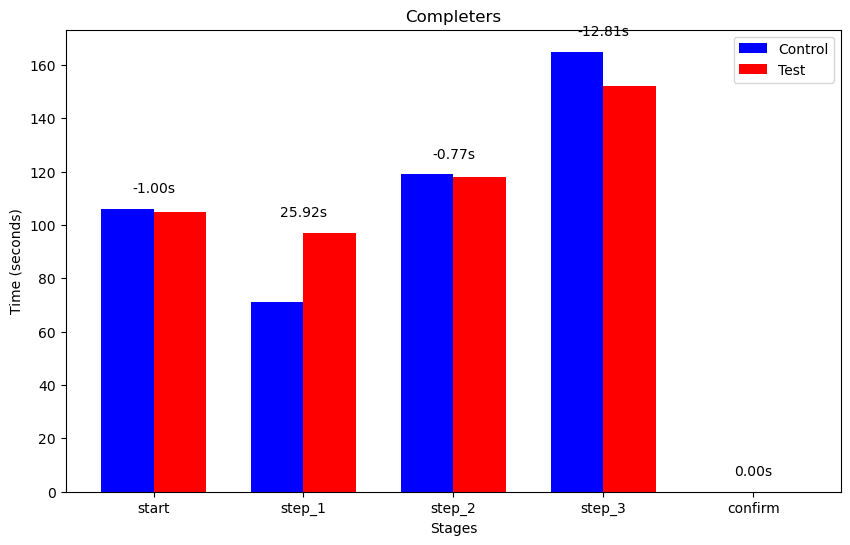

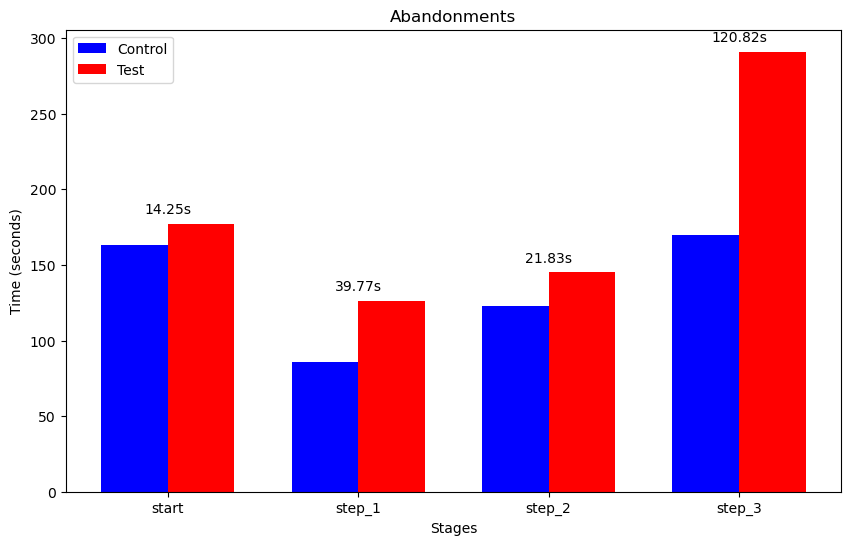

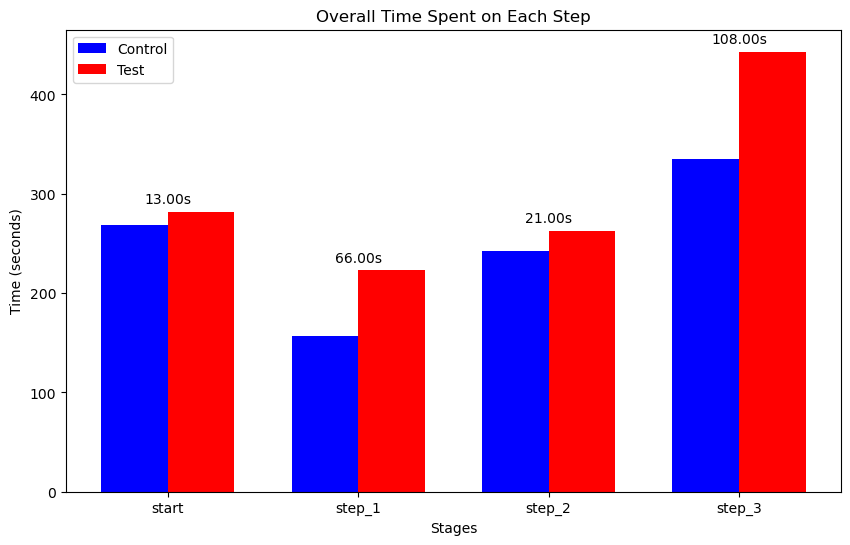

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Successful Cases
stages_successful = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
control_successful = [106, 71, 119, 165, 0]  # in seconds
test_successful = [105, 97, 118, 152, 0]     # in seconds
difference_successful = [-1.00, 25.92, -0.77, -12.81, 0.0]

# Data for Failed Cases
stages_failed = ['start', 'step_1', 'step_2', 'step_3']
control_failed = [163, 86, 123, 170]  # in seconds
test_failed = [177, 126, 145, 291]    # in seconds
difference_failed = [14.25, 39.77, 21.83, 120.82]

# Data for Overall Time Spent on Each Step
stages_overall = ['start', 'step_1', 'step_2', 'step_3']
control_overall = [269, 157, 242, 335]  # in seconds
test_overall = [282, 223, 263, 443]     # in seconds
difference_overall = [13, 66, 21, 108]

# Function to create a bar plot with custom colors
def create_bar_plot(stages, control_times, test_times, differences, title, control_color='blue', test_color='orange'):
    bar_width = 0.35
    index = np.arange(len(stages))

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Add bars with specified colors
    bar1 = ax.bar(index, control_times, bar_width, label='Control', color=control_color)
    bar2 = ax.bar(index + bar_width, test_times, bar_width, label='Test', color=test_color)

    ax.set_xlabel('Stages')
    ax.set_ylabel('Time (seconds)')
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(stages)
    ax.legend()

    # Display difference values above bars
    for i, diff in enumerate(differences):
        ax.text(i + bar_width / 2, max(control_times[i], test_times[i]) + 5, f'{diff:.2f}s', ha='center', va='bottom')

    plt.show()

# Create bar plots for each table with custom colors
create_bar_plot(stages_successful, control_successful, test_successful, difference_successful, 
                'Completers', control_color='blue', test_color='red')
create_bar_plot(stages_failed, control_failed, test_failed, difference_failed, 
                'Abandonments', control_color='blue', test_color='red')
create_bar_plot(stages_overall, control_overall, test_overall, difference_overall, 
                'Overall Time Spent on Each Step', control_color='blue', test_color='red')


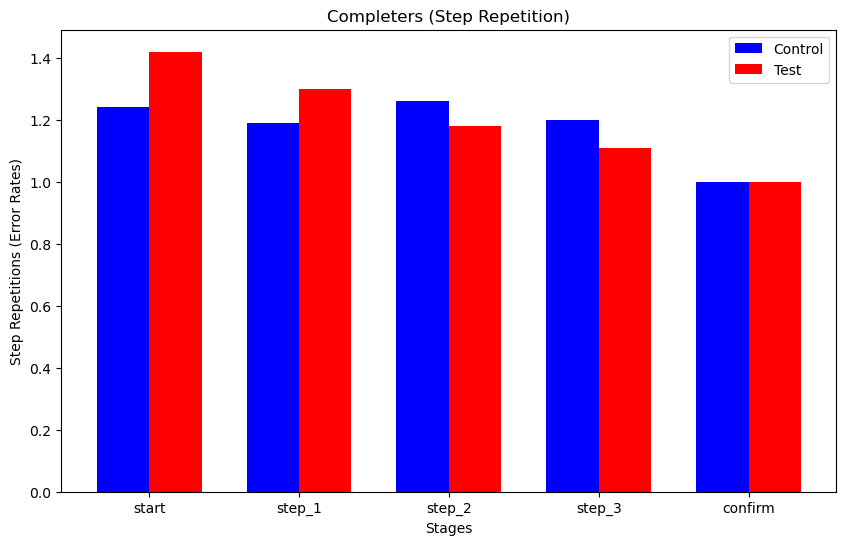

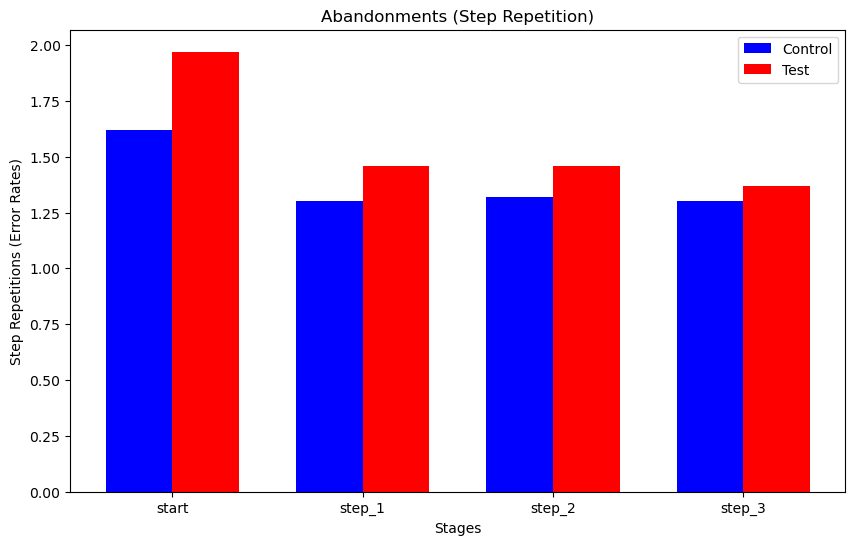

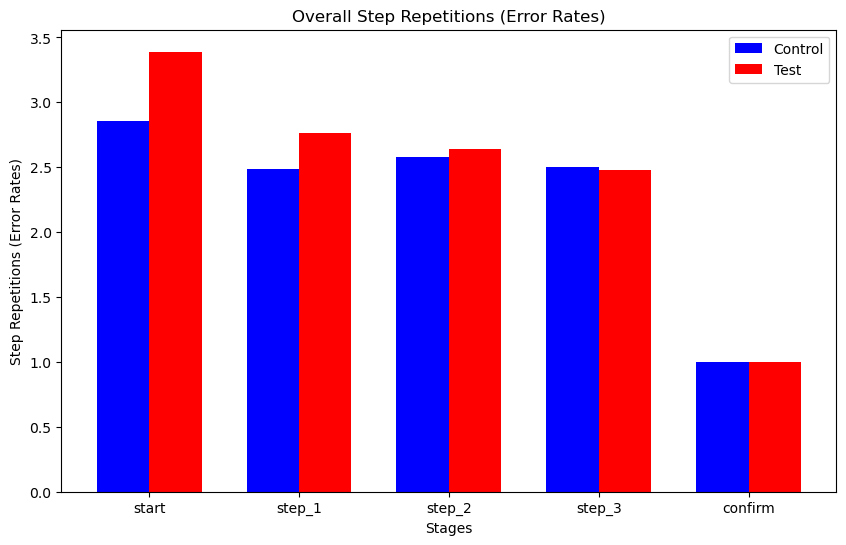

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Successful Cases (Error Rates / Step Repetition)
stages_successful_error = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
control_successful_error = [1.24, 1.19, 1.26, 1.20, 1.00]
test_successful_error = [1.42, 1.30, 1.18, 1.11, 1.00]

# Data for Failed Cases (Error Rates / Step Repetition)
stages_failed_error = ['start', 'step_1', 'step_2', 'step_3']
control_failed_error = [1.62, 1.30, 1.32, 1.30]
test_failed_error = [1.97, 1.46, 1.46, 1.37]

# Data for Overall Step Repetitions (Error Rates / Step Repetition)
stages_overall_error = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
control_overall_error = [2.86, 2.49, 2.58, 2.50, 1.00]
test_overall_error = [3.39, 2.76, 2.64, 2.48, 1.00]

# Function to create a bar plot with custom colors
def create_error_rate_bar_plot(stages, control_values, test_values, title, control_color='blue', test_color='red'):
    bar_width = 0.35
    index = np.arange(len(stages))

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Add bars with specified colors
    bar1 = ax.bar(index, control_values, bar_width, label='Control', color=control_color)
    bar2 = ax.bar(index + bar_width, test_values, bar_width, label='Test', color=test_color)

    ax.set_xlabel('Stages')
    ax.set_ylabel('Step Repetitions (Error Rates)')
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(stages)
    ax.legend()

    plt.show()

# Create bar plots for each table with blue for control and red for test
create_error_rate_bar_plot(stages_successful_error, control_successful_error, test_successful_error, 
                           'Completers (Step Repetition)', control_color='blue', test_color='red')
create_error_rate_bar_plot(stages_failed_error, control_failed_error, test_failed_error, 
                           'Abandonments (Step Repetition)', control_color='blue', test_color='red')
create_error_rate_bar_plot(stages_overall_error, control_overall_error, test_overall_error, 
                           'Overall Step Repetitions (Error Rates)', control_color='blue', test_color='red')


# Session Duration

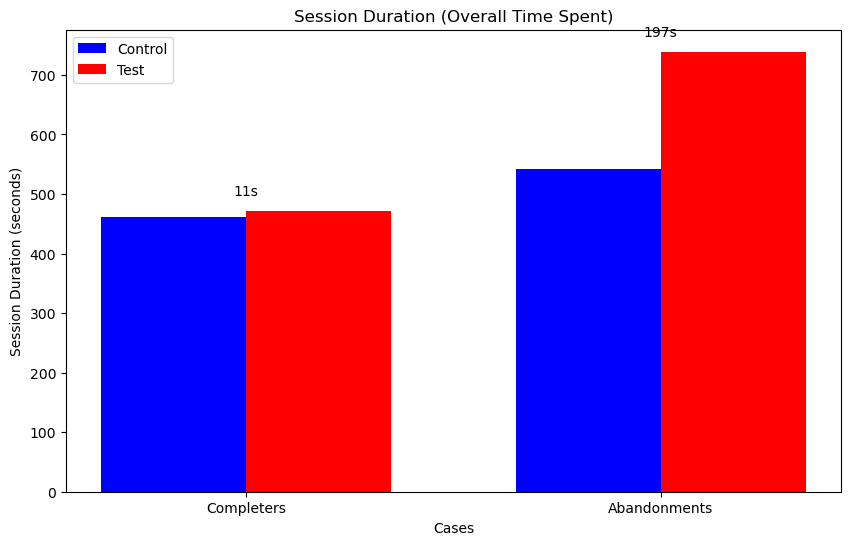

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Session Duration (Overall Time Spent)
#cases = ['Successful Cases', 'Failed Cases', 'Overall Session Duration']
cases = ['Completers', 'Abandonments']
control_duration = [461, 542]  # in seconds
test_duration = [472, 739]  # in seconds
difference_duration = [11, 197]  # in seconds

# Function to create a bar plot for session duration
def create_session_duration_bar_plot(cases, control_times, test_times, title, control_color='blue', test_color='red'):
    bar_width = 0.35
    index = np.arange(len(cases))

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Add bars with specified colors
    bar1 = ax.bar(index, control_times, bar_width, label='Control', color=control_color)
    bar2 = ax.bar(index + bar_width, test_times, bar_width, label='Test', color=test_color)

    ax.set_xlabel('Cases')
    ax.set_ylabel('Session Duration (seconds)')
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(cases)
    ax.legend()

    # Display difference values above bars
    for i, diff in enumerate(difference_duration):
        ax.text(i + bar_width / 2, max(control_times[i], test_times[i]) + 20, f'{diff}s', ha='center', va='bottom')

    plt.show()

# Create the bar plot for session duration
create_session_duration_bar_plot(cases, control_duration, test_duration, 
                                 'Session Duration (Overall Time Spent)', control_color='blue', test_color='red')
